<h1 id="tocheading">Table of Contents</h1>
<div id="toc"></div>

In [1]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [2]:
from __future__ import print_function, division
import pandas as pd
import pylab as pl
import os
import csv
import seaborn
import statsmodels.formula.api as smf
import statsmodels.api as sm
import scipy.stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Getting weather data

In [3]:
weather = pd.read_csv('../Final_Data/London_weather_hourly_winter_2013-14_(00).csv', parse_dates=[0], infer_datetime_format=True)

weather['Wind_Speed_MPH'] = pd.to_numeric(weather.Wind_Speed_MPH, errors='coerce')
weather.drop('Unnamed: 0', axis=1, inplace=True)

weather.rename(columns = {'Datetime':'DateTime'}, inplace=True)

weather.head()

,DateTime,Dew_Point_F,Temperature_F,Wind_Speed_MPH
0,2013-12-01 00:00:00,32.0,33.8,4.6
1,2013-12-01 01:00:00,33.8,33.8,4.6
2,2013-12-01 02:00:00,33.8,35.6,4.6
3,2013-12-01 03:00:00,35.6,35.6,4.6
4,2013-12-01 04:00:00,35.6,37.4,8.1


## Getting energy data

In [4]:
energy = pd.read_csv('../Final_Data/energy_final_2013_14.csv', parse_dates=[0], infer_datetime_format=True)

energy.drop('Unnamed: 0', axis=1, inplace=True)

energy.head()

,DateTime,Adversity,Affluent,Comfortable,Overall
0,2013-12-01 01:00:00,0.386444,0.479599,0.424813,0.433500
1,2013-12-01 02:00:00,0.301773,0.381671,0.314566,0.336542
2,2013-12-01 03:00:00,0.253057,0.335496,0.263379,0.288132
3,2013-12-01 04:00:00,0.229611,0.312186,0.252521,0.268237
4,2013-12-01 05:00:00,0.217060,0.305041,0.253142,0.261459


## Plot energy data by income

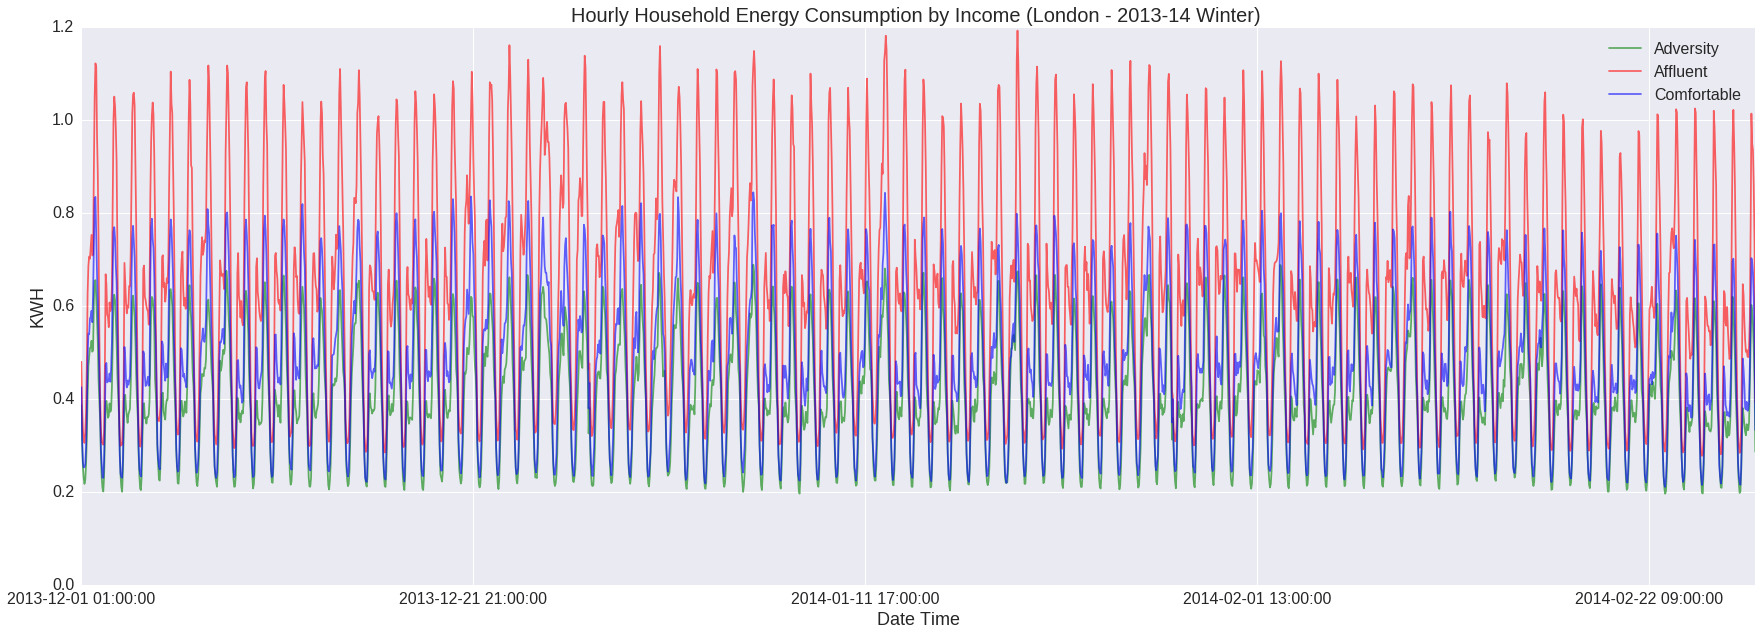

In [5]:
ax = pl.figure(figsize=(30,10)).add_subplot(111)
energy.plot(x='DateTime', y='Adversity', color='Green',alpha=.6, ax=ax)
energy.plot(x='DateTime', y='Affluent', color='Red', alpha=.6, ax=ax)
energy.plot(x='DateTime', y='Comfortable', color='Blue',alpha=.6, ax=ax)
pl.title('Hourly Household Energy Consumption by Income (London - 2013-14 Winter) ', fontsize=20)
pl.xticks(fontsize=16)
pl.yticks(fontsize=16)
pl.ylabel("KWH", fontsize=18)
pl.xlabel("Date Time", fontsize=18)
pl.legend(fontsize=16)
pl.show()

## Merge and plot energy and weather data

In [6]:
final2013_14 = pd.merge(weather, energy, on='DateTime')
final2013_14.head()

,DateTime,Dew_Point_F,Temperature_F,Wind_Speed_MPH,Adversity,Affluent,Comfortable,Overall
0,2013-12-01 01:00:00,33.8,33.8,4.6,0.386444,0.479599,0.424813,0.433500
1,2013-12-01 02:00:00,33.8,35.6,4.6,0.301773,0.381671,0.314566,0.336542
2,2013-12-01 03:00:00,35.6,35.6,4.6,0.253057,0.335496,0.263379,0.288132
3,2013-12-01 04:00:00,35.6,37.4,8.1,0.229611,0.312186,0.252521,0.268237
4,2013-12-01 05:00:00,37.4,39.2,4.6,0.217060,0.305041,0.253142,0.261459


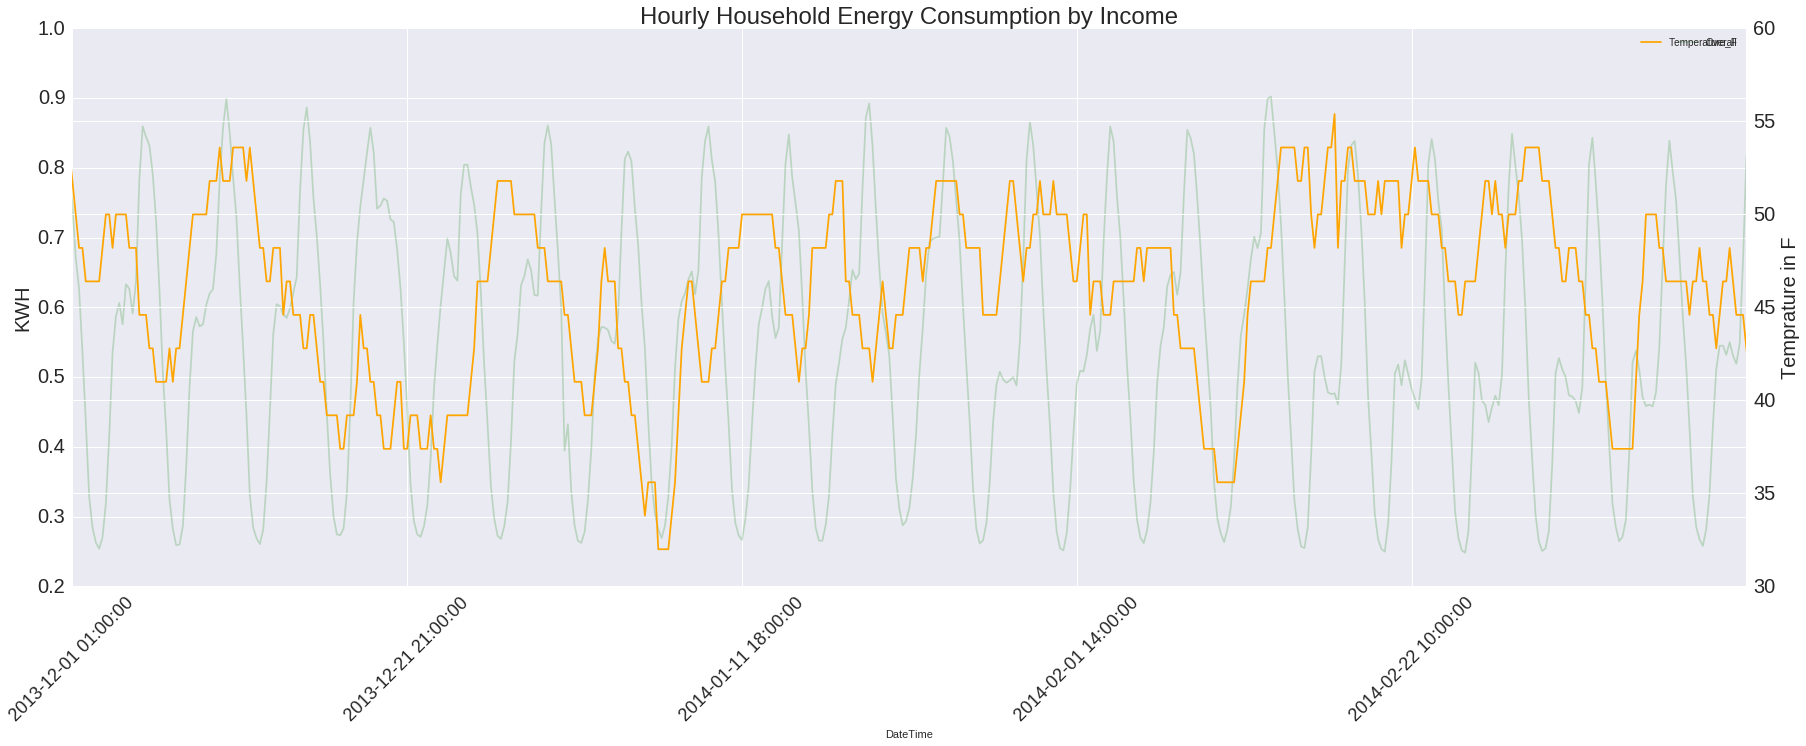

In [7]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
ax2 = ax1.twinx()

final2013_14.plot(x='DateTime', y='Overall', color='Green', alpha=.2, ax=ax1)
# final2013_14.plot(x='DateTime', y='Affluent', color='Red', alpha=.1, ax=ax1)
# final2013_14.plot(x='DateTime', y='Comfortable', color='Blue',alpha=.1, ax=ax1)
final2013_14.plot(x='DateTime', y='Temperature_F', fontsize=16, color='orange', alpha=1, ax=ax2)

pl.setp(ax1.get_yticklabels(), fontsize=20)
pl.setp(ax2.get_yticklabels(), fontsize=20)
pl.setp(ax1.get_xticklabels(), rotation=45, fontsize=18)

ax1.set_ylabel("KWH", fontsize=20)
ax2.set_ylabel("Temprature in F", fontsize=20)

pl.xlabel("Date Time", fontsize=20)
pl.title('Hourly Household Energy Consumption by Income', fontsize=24)

pl.xlim(500, 1000)
pl.show()

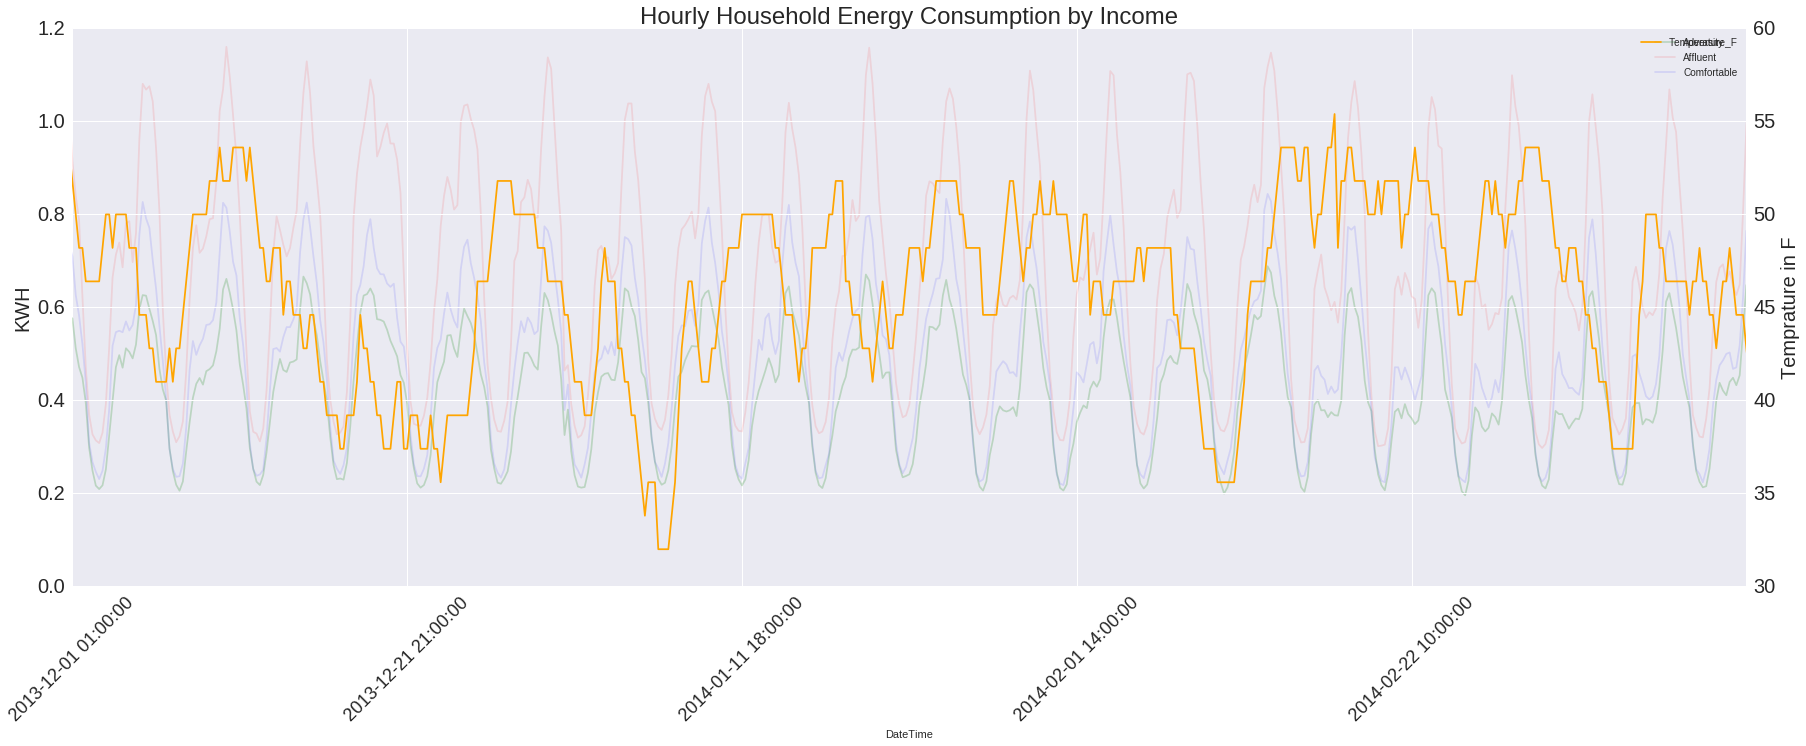

In [8]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
ax2 = ax1.twinx()

final2013_14.plot(x='DateTime', y='Adversity', color='Green', alpha=.2, ax=ax1)
final2013_14.plot(x='DateTime', y='Affluent', color='Red', alpha=.1, ax=ax1)
final2013_14.plot(x='DateTime', y='Comfortable', color='Blue',alpha=.1, ax=ax1)
final2013_14.plot(x='DateTime', y='Temperature_F', fontsize=16, color='orange', alpha=1, ax=ax2)

pl.setp(ax1.get_yticklabels(), fontsize=20)
pl.setp(ax2.get_yticklabels(), fontsize=20)
pl.setp(ax1.get_xticklabels(), rotation=45, fontsize=18)

ax1.set_ylabel("KWH", fontsize=20)
ax2.set_ylabel("Temprature in F", fontsize=20)

pl.xlabel("Date Time", fontsize=20)
pl.title('Hourly Household Energy Consumption by Income', fontsize=24)

pl.xlim(500, 1000)
pl.show()

## Regress directly Energy x Temperature

In [9]:
#OLS of Low_Income ~ Temperature_F
regress1 = smf.ols(formula = 'Overall ~ Temperature_F', data = final2013_14).fit()
print ('pvalue for temperature vs high income is ', regress1.pvalues[1])
regress1.summary()

pvalue for temperature vs high income is  1.62392168288e-11


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Overall   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     45.88
Date:                Sun, 11 Dec 2016   Prob (F-statistic):           1.62e-11
Time:                        18:23:28   Log-Likelihood:                 679.22
No. Observations:                2135   AIC:                            -1354.
Df Residuals:                    2133   BIC:                            -1343.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.2801      0.036      7.823      0.000         0.210     0.350
Temperature_F     0.0054      0.001      6.773      0.000         0.004     0.007
==============================================================================
Omnibus:                      235.496   Durbin-Watson:                   0.157
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               88.157
Skew:                           0.270   Prob(JB):                     7.19e-20
Kurtosis:                       2.164   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Since regression does not show any correlation, look for alternatives. 
The main reason of energy consumption variability is the daily cycle of energy use. If we offset the daily pattern we can see more clearly how weather (namely Temperature) plays a role on energy consumption.

### Trying with lag

In [10]:
#defining a dataframe to store r-squared values
lag = np.linspace(0,12,13)
rsqd = pd.DataFrame(lag, columns=['lag'])
rsqd['1deg'] = np.zeros(13)
rsqd['1deg_adj'] = np.zeros(13)
rsqd['2deg'] = np.zeros(13)
rsqd['2deg_adj'] = np.zeros(13)
rsqd['3deg'] = np.zeros(13)
rsqd['3deg_adj'] = np.zeros(13)
rsqd['LR12'] = np.zeros(13)
rsqd['LR23'] = np.zeros(13)
rsqd.head()

,lag,1deg,1deg_adj,2deg,2deg_adj,3deg,3deg_adj,LR12,LR23
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/lib/python2.7/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:18: Settin

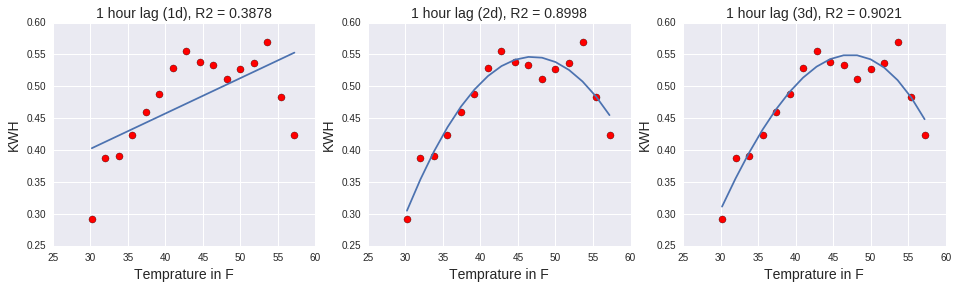

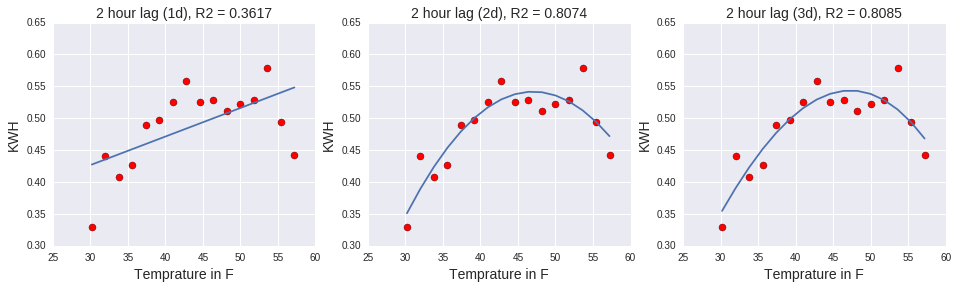

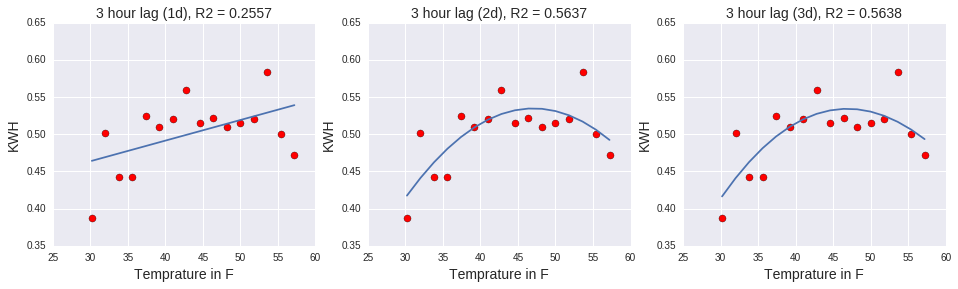

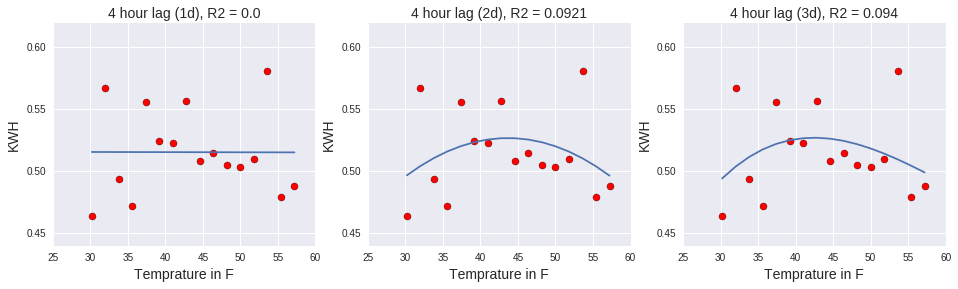

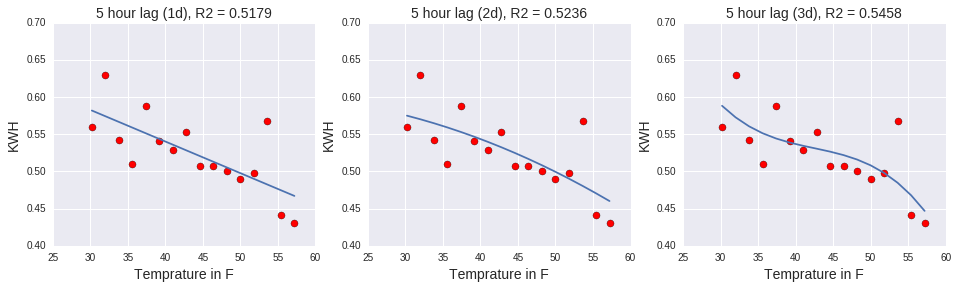

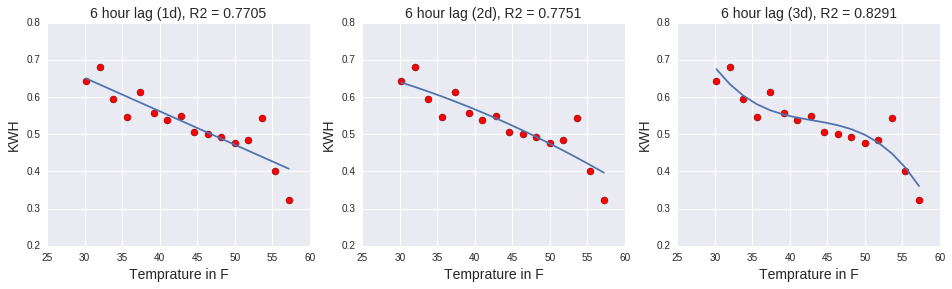

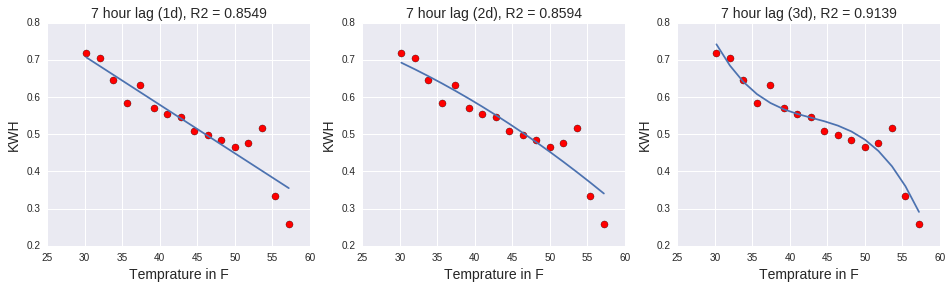

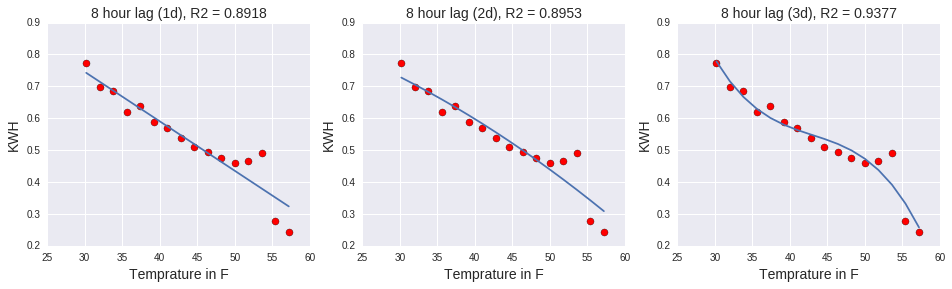

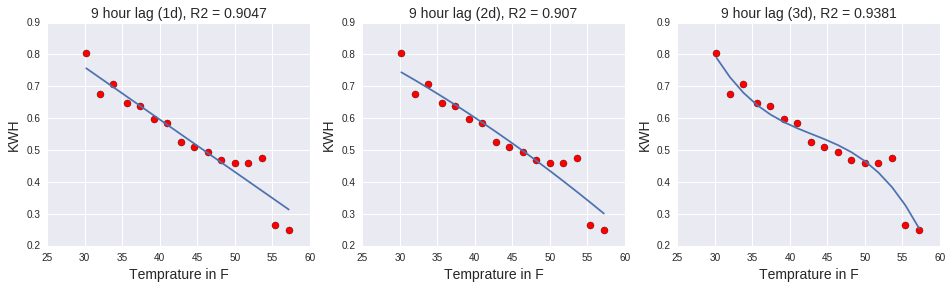

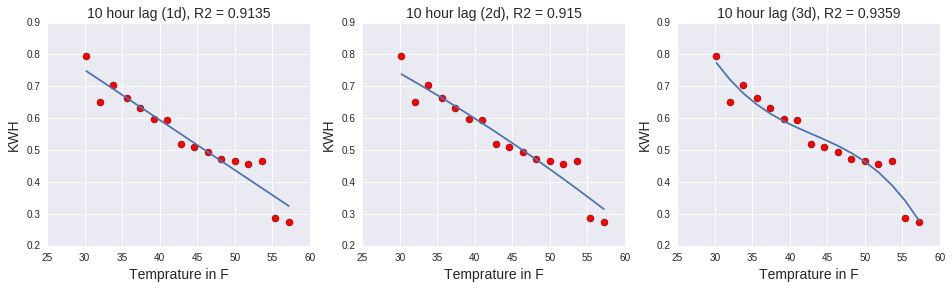

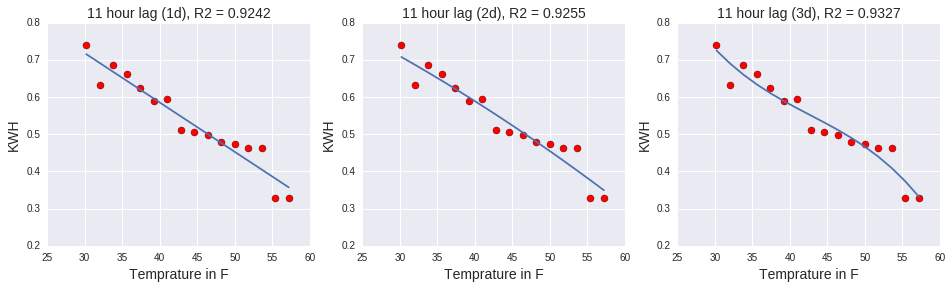

In [11]:
for i in range(1,12):
    #establishing the lag
    x = np.array(final2013_14.Temperature_F[i:])
    y1 = np.array(final2013_14.Overall[:-i])
    timelag = pd.DataFrame()
    timelag['Temp'] = x
    timelag['Overall'] = y1
    #grouping by temperature
    #lag_grp = timelag
    lag_grp = timelag.groupby(['Temp']).mean()
    lag_grp.reset_index(inplace=True)
    #running regression
    p1 = smf.ols(formula = 'Overall ~ Temp', data = lag_grp).fit()
    p2 = smf.ols(formula = 'Overall ~ np.power(Temp, 2) + Temp', data = lag_grp).fit()
    p3 = smf.ols(formula = 'Overall ~ np.power(Temp, 3) + np.power(Temp, 2) + Temp', data = lag_grp).fit()
    #saving r-squared values
    rsqd['1deg'][i] = p1.rsquared
    rsqd['2deg'][i] = p2.rsquared
    rsqd['3deg'][i] = p3.rsquared
    rsqd['1deg_adj'][i] = p1.rsquared_adj
    rsqd['2deg_adj'][i] = p2.rsquared_adj
    rsqd['3deg_adj'][i] = p3.rsquared_adj
    rsqd['LR12'][i] = str(p2.compare_lr_test(p1))
    rsqd['LR23'][i] = str(p3.compare_lr_test(p2))
    #ploting results
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
    lag_grp.plot(kind='scatter', x='Temp', y='Overall', color='r',s=50, alpha=1, ax=ax1)
    ax1.plot(lag_grp.Temp, p1.predict())
    ax1.set_title('{0} hour lag (1d), R2 = {1}'.format(i, round(p1.rsquared, 4)), fontsize=14)
    ax1.set_ylabel("KWH", fontsize=14)
    ax1.set_xlabel("Temprature in F", fontsize=14)
    lag_grp.plot(kind='scatter', x='Temp', y='Overall', color='r',s=50, alpha=1, ax=ax2)
    ax2.plot(lag_grp.Temp, p2.predict())
    ax2.set_title('{0} hour lag (2d), R2 = {1}'.format(i, round(p2.rsquared, 4)), fontsize=14)
    ax2.set_ylabel("KWH", fontsize=14)
    ax2.set_xlabel("Temprature in F", fontsize=14)
    lag_grp.plot(kind='scatter', x='Temp', y='Overall', color='r',s=50, alpha=1, ax=ax3)
    ax3.plot(lag_grp.Temp, p3.predict())
    ax3.set_title('{0} hour lag (3d), R2 = {1}'.format(i, round(p3.rsquared, 4)), fontsize=14)
    ax3.set_ylabel("KWH", fontsize=14)
    ax3.set_xlabel("Temprature in F", fontsize=14)
    

In [12]:
rsqd

,lag,1deg,1deg_adj,2deg,2deg_adj,3deg,3deg_adj,LR12,LR23
0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0,0
1,1.0,0.387772,0.344041,0.899788,0.884371,0.902097,0.877622,"(28.957098972914395, 7.3999124351831532e-08, 1.0)","(0.37300930182092884, 0.541368492905689, 1.0)"
2,2.0,0.361686,0.316092,0.807390,0.777758,0.808495,0.760619,"(19.170625547573451, 1.1953880763718647e-05, 1.0)","(0.092078819577920967, 0.76155081702355798, 1.0)"
3,3.0,0.255719,0.202557,0.563657,0.496527,0.563835,0.454794,"(8.5438347000004313, 0.0034669447670984325, 1.0)","(0.006519438198765215, 0.93564630909180013, 1.0)"
4,4.0,0.000008,-0.071420,0.092075,-0.047606,0.093954,-0.132558,"(1.5453652155555346, 0.21382096696990116, 1.0)","(0.033137139932705395, 0.85555439929483745, 1.0)"
5,5.0,0.517886,0.483449,0.523639,0.450353,0.545822,0.432277,"(0.19209937371152819, 0.66117504079739275, 1.0)","(0.76296795686866403, 0.38240130119412452, 1.0)"
6,6.0,0.770519,0.754127,0.775108,0.740509,0.829062,0.786327,"(0.32318722478144934, 0.5696985059447478, 1.0)","(4.3891163034906242, 0.036169055449301511, 1.0)"
7,7.0,0.854909,0.844546,0.859387,0.837754,0.913891,0.892364,"(0.50155163352216903, 0.47881914017019378, 1.0)","(7.8464384436196752, 0.0050920925146494701, 1.0)"
8,8.0,0.891808,0.884080,0.895311,0.879205,0.937675,0.922094,"(0.52651642252592978, 0.46807512111868999, 1.0)","(8.2982200839310565, 0.003968395299926048, 1.0)"
9,9.0,0.904729,0.897924,0.906999,0.892692,0.938104,0.922630,"(0.38587068203746355, 0.53447797236035677, 1.0)","(6.5143532486524265, 0.010700723155862381, 1.0)"


## Applying seasonal decomposition before regressing

In [23]:
final2013_14.head()

,DateTime,Dew_Point_F,Temperature_F,Wind_Speed_MPH,Adversity,Affluent,Comfortable,Overall,HI_residuals
0,2013-12-01 01:00:00,33.8,33.8,4.6,0.386444,0.479599,0.424813,0.433500,0.731554
1,2013-12-01 02:00:00,33.8,35.6,4.6,0.301773,0.381671,0.314566,0.336542,0.687762
2,2013-12-01 03:00:00,35.6,35.6,4.6,0.253057,0.335496,0.263379,0.288132,0.664617
3,2013-12-01 04:00:00,35.6,37.4,8.1,0.229611,0.312186,0.252521,0.268237,0.644965
4,2013-12-01 05:00:00,37.4,39.2,4.6,0.217060,0.305041,0.253142,0.261459,0.618981


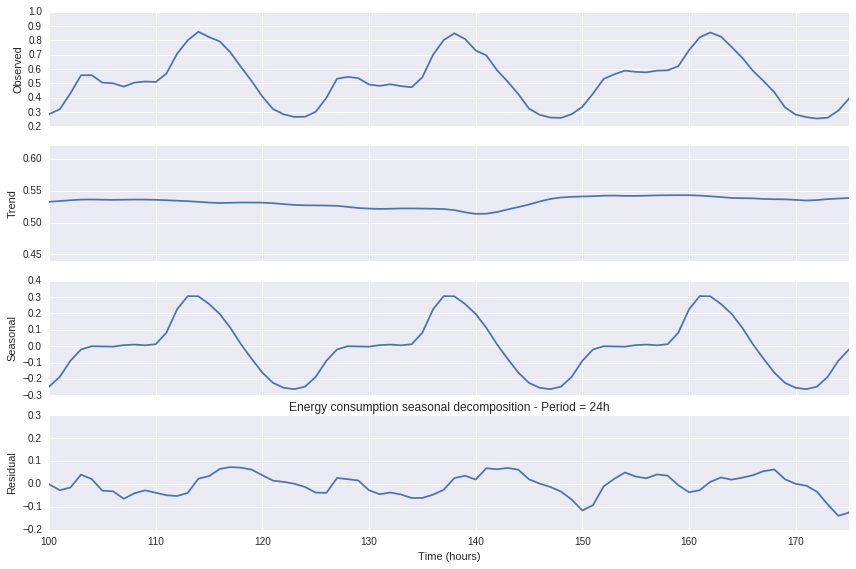

In [54]:
##Seasonal Decomposition of high income energy consumption
data = np.array(final2013_14.Overall)

#Seasonal Decomposition using statsmodels api
res = sm.tsa.seasonal_decompose(data, freq = 24)
plt.rcParams['figure.figsize'] = (12,8)
resplot = res.plot()
pl.xlabel("Time (hours)")
pl.title("Energy consumption seasonal decomposition - Period = 24h")
pl.xlim(100, 175)
resplot.savefig("../Plots/Seasonal_winter.png")

In [26]:
#Adding the residuals of the seasonal deccomposition to the dataframe
final2013_14['Overall_residuals'] = res.observed - res.seasonal
final2013_14.head()

,DateTime,Dew_Point_F,Temperature_F,Wind_Speed_MPH,Adversity,Affluent,Comfortable,Overall,HI_residuals,Overall_residuals
0,2013-12-01 01:00:00,33.8,33.8,4.6,0.386444,0.479599,0.424813,0.433500,0.595021,0.595021
1,2013-12-01 02:00:00,33.8,35.6,4.6,0.301773,0.381671,0.314566,0.336542,0.560742,0.560742
2,2013-12-01 03:00:00,35.6,35.6,4.6,0.253057,0.335496,0.263379,0.288132,0.542220,0.542220
3,2013-12-01 04:00:00,35.6,37.4,8.1,0.229611,0.312186,0.252521,0.268237,0.530657,0.530657
4,2013-12-01 05:00:00,37.4,39.2,4.6,0.217060,0.305041,0.253142,0.261459,0.508258,0.508258


In [27]:
#OLS HI_residual ~ Temperature_F
regress2 = smf.ols(formula = 'Overall_residuals ~ Temperature_F', data = final2013_14).fit()
print ('pvalue for temperature vs low income is ', regress2.pvalues[1])
regress2.summary()

pvalue for temperature vs low income is  0.00187742888799


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:      Overall_residuals   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.004
Method:                 Least Squares   F-statistic:                     9.690
Date:                Sun, 11 Dec 2016   Prob (F-statistic):            0.00188
Time:                        18:49:41   Log-Likelihood:                 3081.3
No. Observations:                2135   AIC:                            -6159.
Df Residuals:                    2133   BIC:                            -6147.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.5572      0.012     47.938      0.000         0.534     0.580
Temperature_F    -0.0008      0.000     -3.113      0.002        -0.001    -0.000
==============================================================================
Omnibus:                      208.172   Durbin-Watson:                   0.279
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              354.875
Skew:                           0.680   Prob(JB):                     8.71e-78
Kurtosis:                       4.463   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

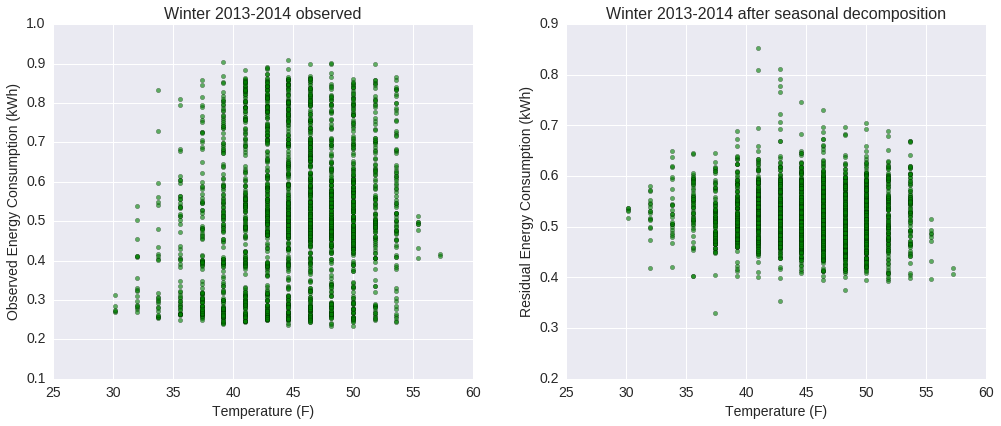

In [51]:
#plotting HI_residuasls and Temperature_F
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(14,6))

final2013_14.plot(x='Temperature_F', y='Overall', kind='scatter', color="green", alpha=.6, ax=ax1)

ax1.set_title('Winter 2013-2014 observed', fontsize=16)
ax1.set_ylabel("Observed Energy Consumption (kWh)", fontsize=14)
ax1.set_xlabel("Temperature (F)", fontsize=14)

final2013_14.plot(x='Temperature_F', y='Overall_residuals', kind='scatter', color="green", alpha=.6, ax=ax2)

ax2.set_title('Winter 2013-2014 after seasonal decomposition', fontsize=16)
ax2.set_ylabel("Residual Energy Consumption (kWh)", fontsize=14)
ax2.set_xlabel("Temperature (F)", fontsize=14)

pl.setp(ax1.get_yticklabels(), fontsize=14)
pl.setp(ax2.get_yticklabels(), fontsize=14)
pl.setp(ax1.get_xticklabels(), fontsize=14)
pl.setp(ax2.get_xticklabels(), fontsize=14)

pl.tight_layout(w_pad=4)

pl.show()

f.savefig("../Plots/Seasonal_winter_scatter.png")

### Testing with Lag

In [17]:
#defining a dataframe to store r-squared values
lag = np.linspace(0,12,13)
rsqd = pd.DataFrame(lag, columns=['lag'])
rsqd['1deg'] = np.zeros(13)
rsqd['1deg_adj'] = np.zeros(13)
rsqd['2deg'] = np.zeros(13)
rsqd['2deg_adj'] = np.zeros(13)
rsqd['3deg'] = np.zeros(13)
rsqd['3deg_adj'] = np.zeros(13)
rsqd['LR12'] = np.zeros(13)
rsqd['LR23'] = np.zeros(13)
rsqd.head()

,lag,1deg,1deg_adj,2deg,2deg_adj,3deg,3deg_adj,LR12,LR23
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/opt/rh/anaconda/root/lib/python2.7/site-packages/ipykernel/__main__.py:20: SettingWithCopyWarning: 
A value is trying to be set o

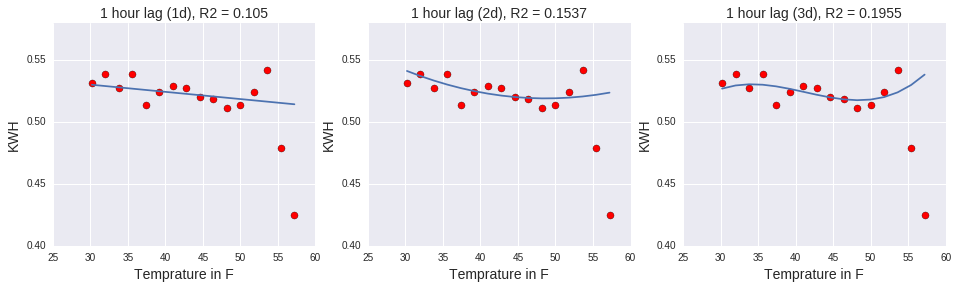

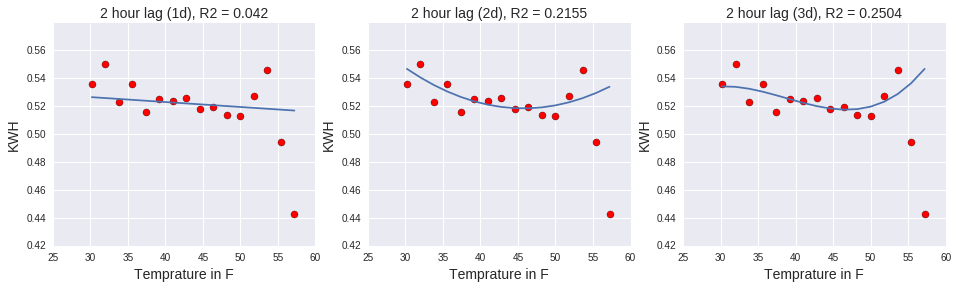

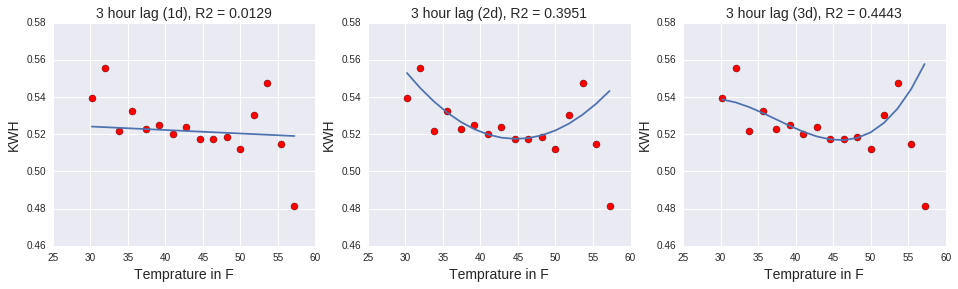

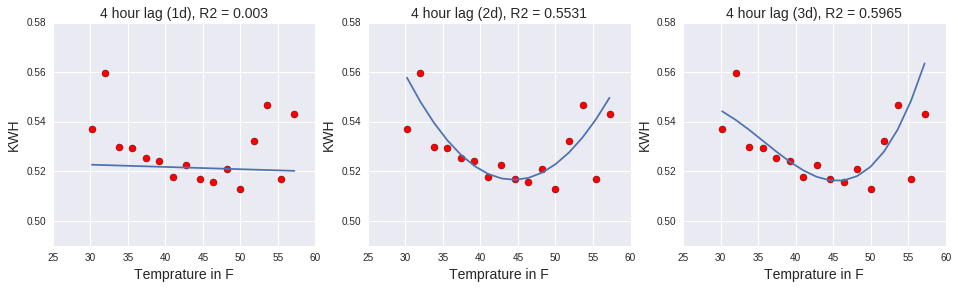

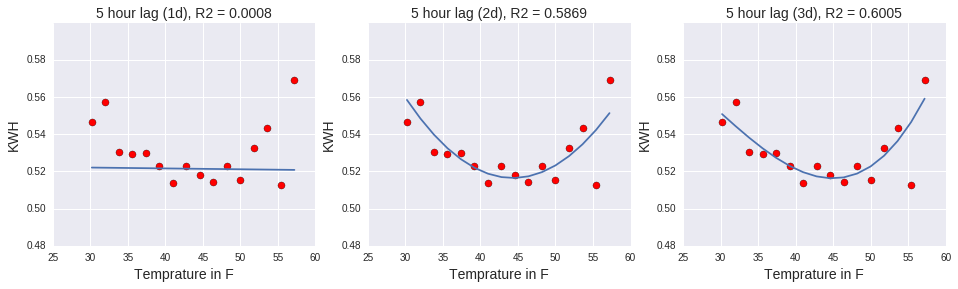

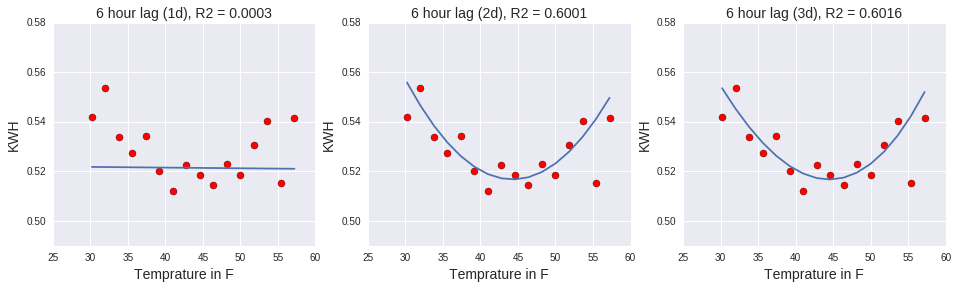

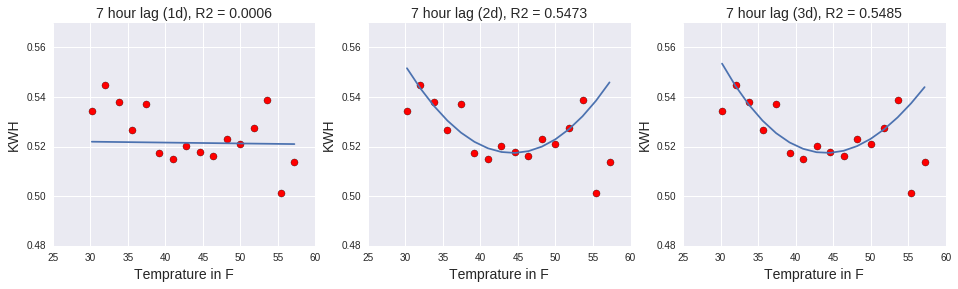

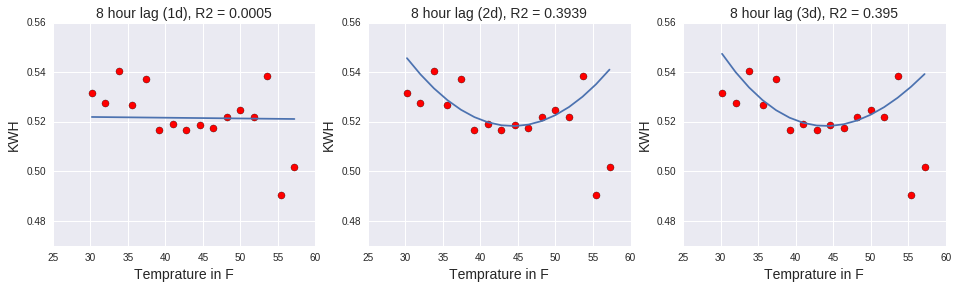

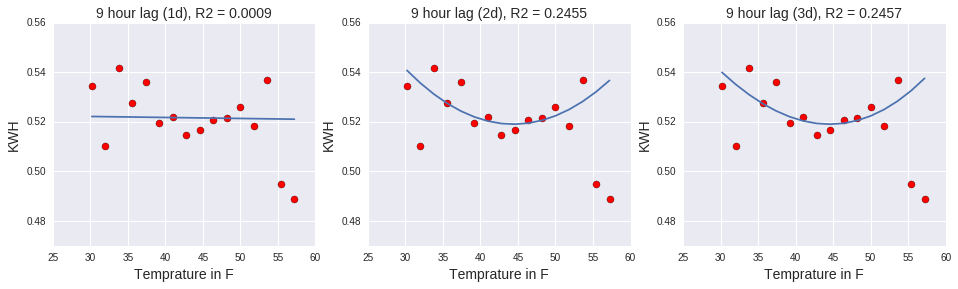

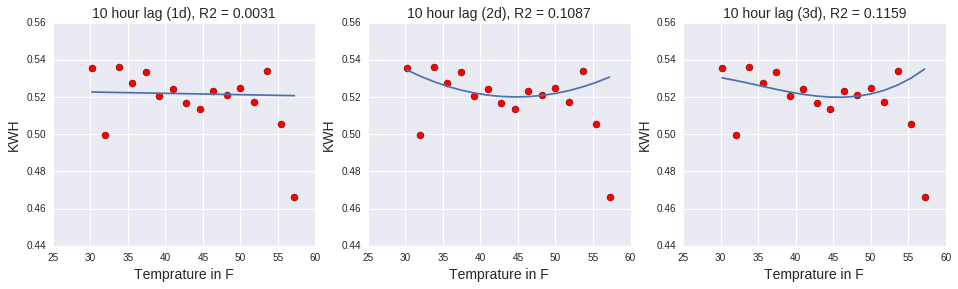

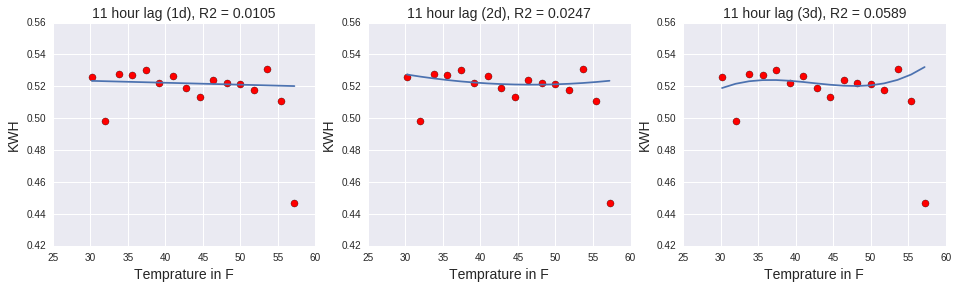

In [18]:
for i in range(1,12):
    #establishing the lag
    x = np.array(final2013_14.Temperature_F[i:])
    y1 = np.array(final2013_14.Overall[:-i])
    timelag = pd.DataFrame()
    timelag['Temp'] = x
    timelag['Overall'] = sm.tsa.seasonal_decompose(y1, freq = 24).observed - sm.tsa.seasonal_decompose(y1, freq = 24).seasonal
    #grouping by temperature
    #lag_grp = timelag
    lag_grp = timelag.groupby(['Temp']).mean()
    w = timelag.groupby(['Temp']).count()
    lag_grp.reset_index(inplace=True)
    #running regression
    p1 = smf.wls(formula = 'Overall ~ Temp', data = lag_grp, weights = w).fit()
    p2 = smf.wls(formula = 'Overall ~ np.power(Temp, 2) + Temp', data = lag_grp, weights = w).fit()
    p3 = smf.wls(formula = 'Overall ~ np.power(Temp, 3) + np.power(Temp, 2) + Temp', data = lag_grp, weights = w).fit()
    #saving r-squared values
    rsqd['1deg'][i] = p1.rsquared
    rsqd['2deg'][i] = p2.rsquared
    rsqd['3deg'][i] = p3.rsquared
    rsqd['1deg_adj'][i] = p1.rsquared_adj
    rsqd['2deg_adj'][i] = p2.rsquared_adj
    rsqd['3deg_adj'][i] = p3.rsquared_adj
    rsqd['LR12'][i] = str(p2.compare_lr_test(p1))
    rsqd['LR23'][i] = str(p3.compare_lr_test(p2))
    #ploting results
    f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16,4))
    lag_grp.plot(kind='scatter', x='Temp', y='Overall', color='r',s=50, alpha=1, ax=ax1)
    ax1.plot(lag_grp.Temp, p1.predict())
    ax1.set_title('{0} hour lag (1d), R2 = {1}'.format(i, round(p1.rsquared, 4)), fontsize=14)
    ax1.set_ylabel("KWH", fontsize=14)
    ax1.set_xlabel("Temprature in F", fontsize=14)
    lag_grp.plot(kind='scatter', x='Temp', y='Overall', color='r',s=50, alpha=1, ax=ax2)
    ax2.plot(lag_grp.Temp, p2.predict())
    ax2.set_title('{0} hour lag (2d), R2 = {1}'.format(i, round(p2.rsquared, 4)), fontsize=14)
    ax2.set_ylabel("KWH", fontsize=14)
    ax2.set_xlabel("Temprature in F", fontsize=14)
    lag_grp.plot(kind='scatter', x='Temp', y='Overall', color='r',s=50, alpha=1, ax=ax3)
    ax3.plot(lag_grp.Temp, p3.predict())
    ax3.set_title('{0} hour lag (3d), R2 = {1}'.format(i, round(p3.rsquared, 4)), fontsize=14)
    ax3.set_ylabel("KWH", fontsize=14)
    ax3.set_xlabel("Temprature in F", fontsize=14)

## Testing different lags for weather and energy consumption data (residuals = observed - dailyseasonality)

In [19]:
def plot_residuals_lag(hh):

    #peak hour (reference for the lag)
    # hh = 18

    fig = pl.figure(figsize=(20,20))

    for i in range(12):

        pl.subplot(6,4,i+1)

        # adjusting the sizes of the arrays 
        if i <= 35-hh:
            res_init = hh-1
        else:
            res_init = hh-1 + 24

        #debugging
        #print ("i = {0}".format(i))
        #print ("xdim = {0}, ydim = {1}".format(final2013_14.Temperature_F[(hh-1)+(i-12)::24].shape, final2013_14.HI_residuals[res_init::24].shape))

        #OLS
        x = np.array(final2013_14.Temperature_F[(hh-1)+(i-12)::24])
        y = np.array(final2013_14.HI_residuals[res_init::24])
        lm = sm.OLS(y, sm.add_constant(x)).fit()
        ypredict = lm.predict(sm.add_constant(x))

        #plot
        pl.plot(x, y,'.')
        pl.plot(x, ypredict, 'r')
        pl.xticks(fontsize=12)
        pl.yticks(fontsize=12)
        pl.title("lag = {0}, R2 = {1}".format(i-12, lm.rsquared), fontsize=16)
        pl.ylabel("KWH", fontsize=14)
        pl.xlabel("Temperature (F)", fontsize=14)

    pl.tight_layout()
    pl.show()
    
    return 0

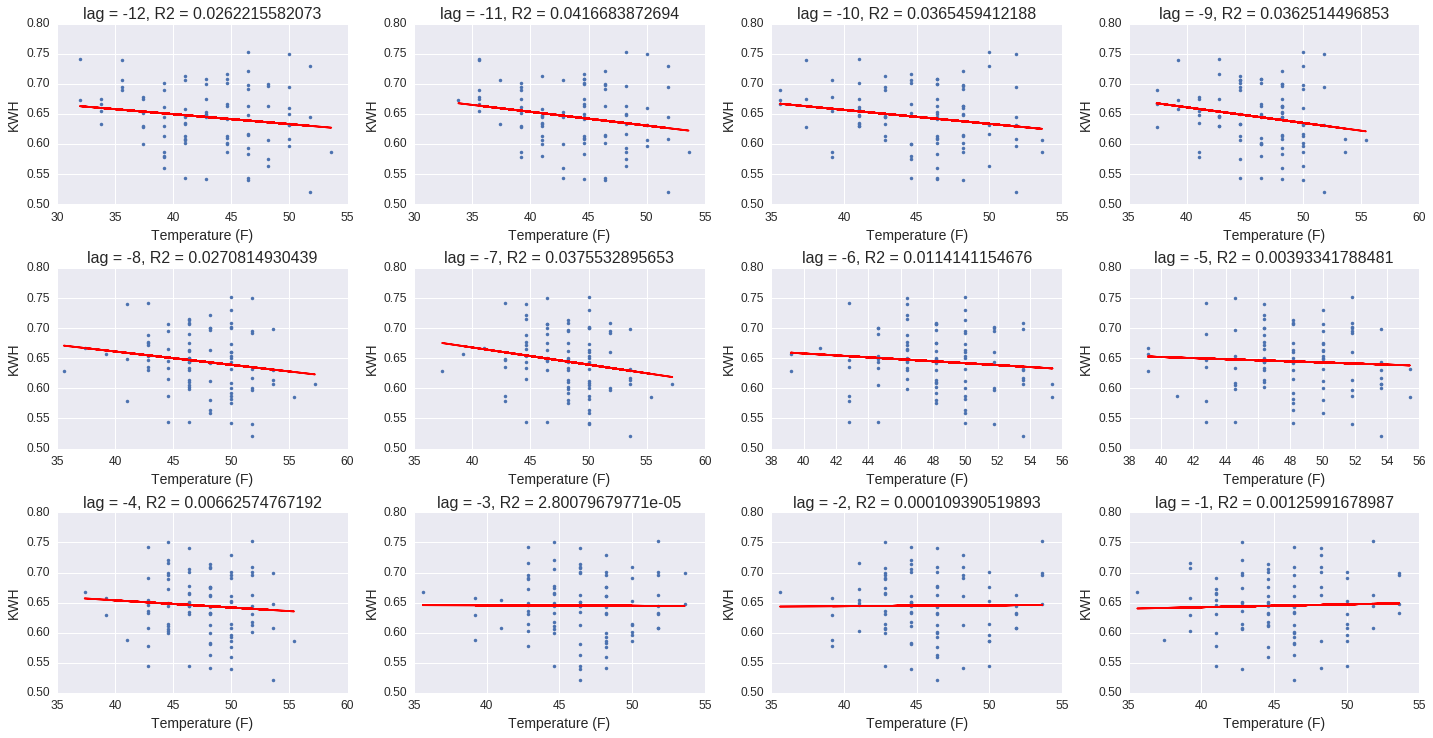

0

In [20]:
plot_residuals_lag(19)

In [21]:
def plot_observed_lag(hh):

    #peak hour (reference for the lag)
    # hh = 18

    fig = pl.figure(figsize=(20,20))

    for i in range(24):

        pl.subplot(6,4,i+1)

        # adjusting the sizes of the arrays 
        if i <= 35-hh:
            res_init = hh-1
        else:
            res_init = hh-1 + 24

        #debugging
        #print ("i = {0}".format(i))
        #print ("xdim = {0}, ydim = {1}".format(final2013_14.Temperature_F[(hh-1)+(i-12)::24].shape, final2013_14.HI_residuals[res_init::24].shape))

        #OLS
        x = np.array(final2013_14.Temperature_F[(hh-1)+(i-12)::24])
        y = np.array(final2013_14.Affluent[res_init::24])
        lm = sm.OLS(y, sm.add_constant(x)).fit()
        ypredict = lm.predict(sm.add_constant(x))

        #plot
        pl.plot(x, y,'.')
        pl.plot(x, ypredict, 'r')
        pl.xticks(fontsize=12)
        pl.yticks(fontsize=12)
        pl.title("lag = {0}, R2 = {1}".format(i-12, lm.rsquared), fontsize=16)
        pl.ylabel("KWH", fontsize=14)
        pl.xlabel("Temperature (F)", fontsize=14)

    pl.tight_layout()
    pl.show()
    
    return 0

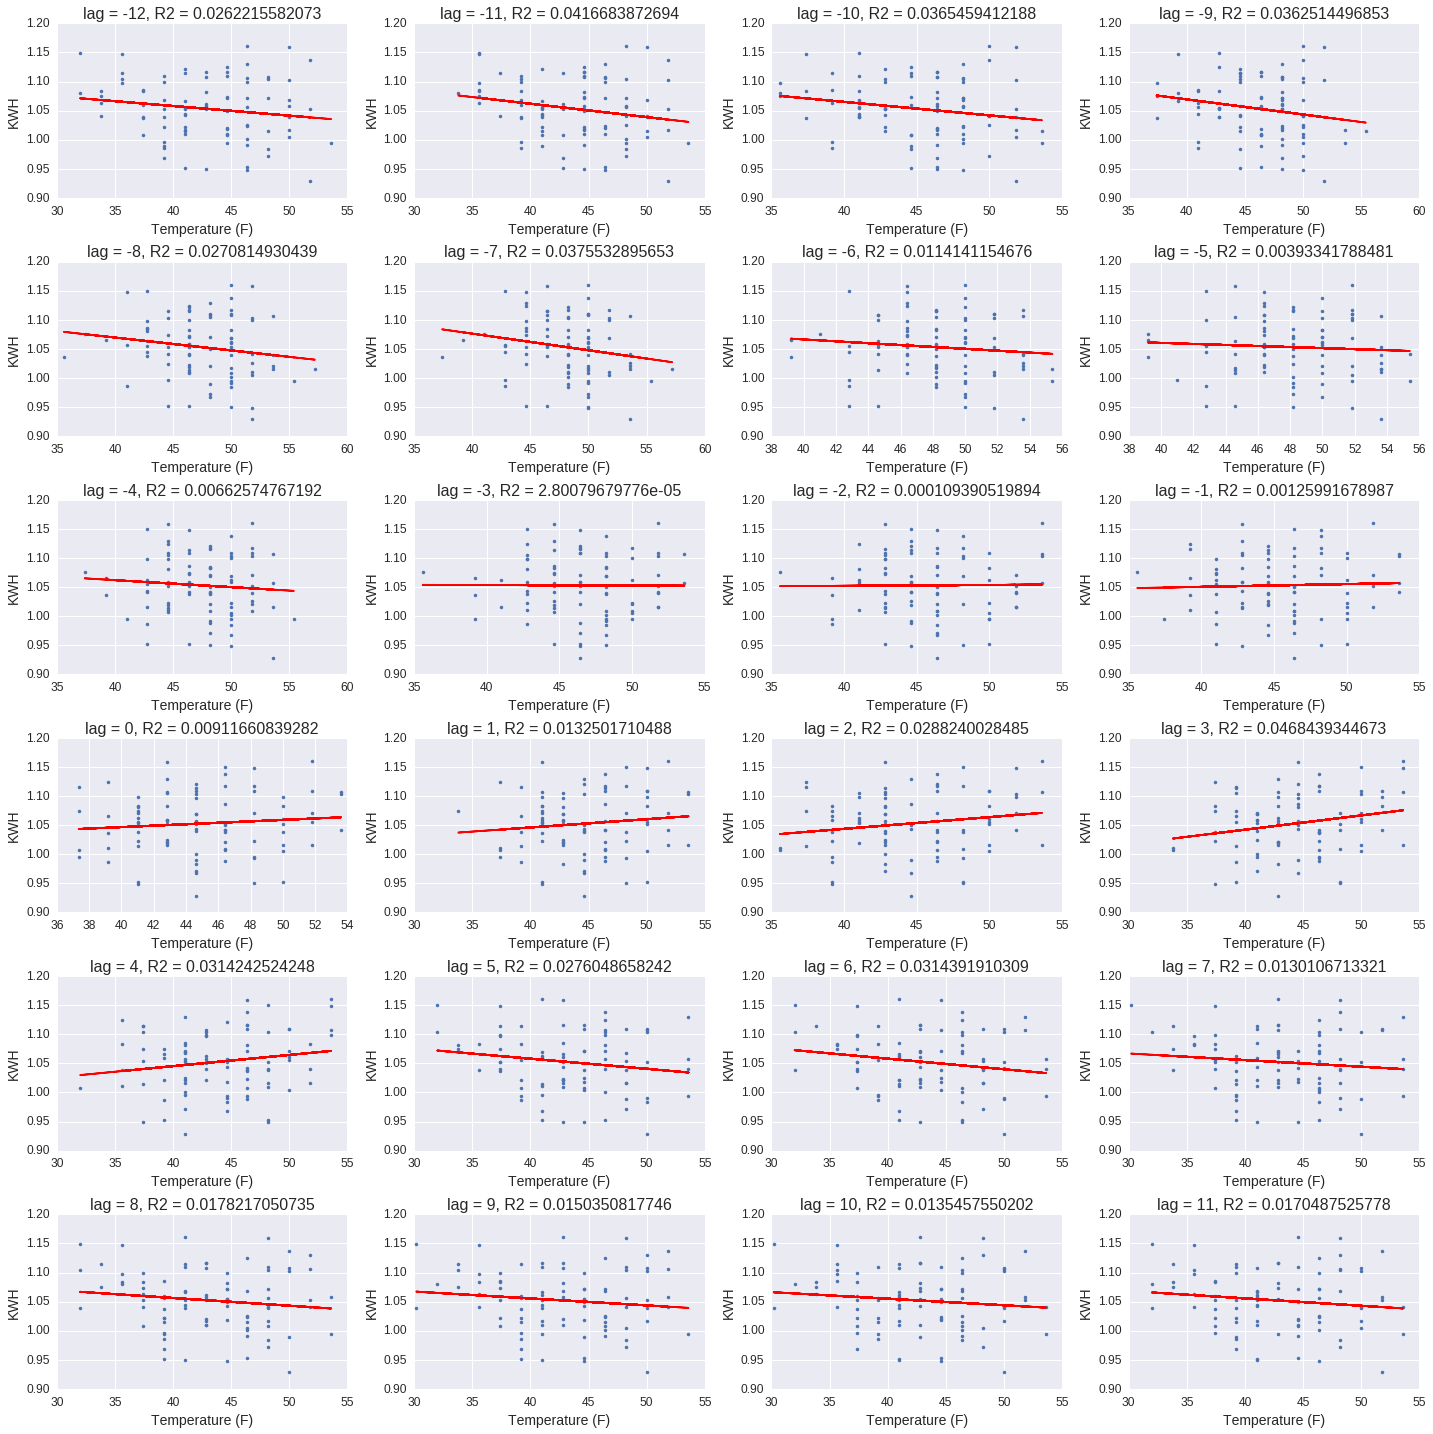

0

In [22]:
plot_observed_lag(19)